In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import folium 

### READING THE DATA

In [2]:
calendar = pd.read_csv (r'/Users/omoyeniogundipe/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Project1/SeattleData/calendar.csv')

listings = pd.read_csv (r'/Users/omoyeniogundipe/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Project1/SeattleData/listings.csv')

reviews = pd.read_csv (r'/Users/omoyeniogundipe/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Project1/SeattleData/reviews.csv')

### DATA UNDERSTANDING

### Calendar

In [3]:
calendar.head(2)
calendar.tail(2)
calendar.count()
calendar.dtypes
calendar.describe(include = 'all')

,listing_id,date,available,price
count,1.393570e+06,1393570,1393570,934542
unique,NaN,365,2,669
top,NaN,2016-01-04,t,$150.00
freq,NaN,3818,934542,36646
mean,5.550111e+06,NaN,NaN,NaN
std,2.962274e+06,NaN,NaN,NaN
min,3.335000e+03,NaN,NaN,NaN
25%,3.258213e+06,NaN,NaN,NaN
50%,6.118244e+06,NaN,NaN,NaN
75%,8.035212e+06,NaN,NaN,NaN


In [4]:
calendar.sample(5)

,listing_id,date,available,price
1334738,7662775,2016-10-28,f,NaN
1224953,4318814,2016-01-17,t,$120.00
239479,413733,2016-02-12,t,$150.00
1188343,2737038,2016-09-28,t,$74.00
1238035,9739482,2016-11-19,t,$55.00


In [5]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


#### How many listings in the calendar data and for how long ?



In [6]:
print("There are {} listings in the Calendar data for {} days, beginning {} and ending {}".
      format(len(calendar.listing_id.unique()),len(calendar.date.unique()),
             calendar.date.min(),calendar.date.max()))



There are 3818 listings in the Calendar data for 365 days, beginning 2016-01-04 and ending 2017-01-02


In [7]:
#We can see that there are missing price data in the dataset. How many missing price values are there? 
print('There are no price data for {} rows'.
                       format(np.sum(calendar.price.isnull())))


There are no price data for 459028 rows


In [8]:
#grouping the prices by availability to understand further why half the price variable has NA values

calendar.groupby('available').price.count()

available
f         0
t    934542
Name: price, dtype: int64

#### 
After grouping the prices by availabilility, between True and False values we can see that when availability is false,the price is not available. and when true, the prices are shown.

### Listings

In [9]:
listings.head(2)
listings.tail(2)
listings.count()
listings.dtypes
listings.describe(include = 'all')

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3818,3.818000e+03,3818,3818,3641,3249,3818,3818,2786,...,3162.000000,3818,0.0,3818,3818,3818,3818,3818,3818.000000,3191.000000
unique,NaN,3818,NaN,1,3792,3478,3119,3742,1,2506,...,NaN,1,NaN,1,2,3,2,2,NaN,NaN
top,NaN,https://www.airbnb.com/rooms/241032,NaN,2016-01-04,Capitol Hill Apartment,This is a modern fully-furnished studio apartm...,"*Note: This fall, there will be major renovati...",Our space is a mix of a hostel and a home. We ...,none,Wallingford is a mostly-residential neighborho...,...,NaN,f,NaN,WASHINGTON,f,strict,f,f,NaN,NaN
freq,NaN,1,NaN,3818,3,15,14,10,3818,17,...,NaN,3818,NaN,3818,3227,1417,3497,3443,NaN,NaN
mean,5.550111e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.452245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.946307,2.078919
std,2.962660e+06,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.750259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.893029,1.822348
min,3.335000e+03,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.020000
25%,3.258256e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.695000
50%,6.118244e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.540000
75%,8.035127e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,3.000000


In [10]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [11]:
listings.shape

(3818, 92)

### Reviews

In [12]:
reviews.head(2)
reviews.tail(2)
reviews.count()
reviews.dtypes
reviews.describe(include = 'all')

,listing_id,id,date,reviewer_id,reviewer_name,comments
count,8.484900e+04,8.484900e+04,84849,8.484900e+04,84849,84831
unique,NaN,NaN,1930,NaN,14380,84136
top,NaN,NaN,2015-09-21,NaN,David,The host canceled this reservation the day bef...
freq,NaN,NaN,580,NaN,870,57
mean,3.005067e+06,3.058765e+07,NaN,1.701301e+07,NaN,NaN
std,2.472877e+06,1.636613e+07,NaN,1.353704e+07,NaN,NaN
min,4.291000e+03,3.721000e+03,NaN,1.500000e+01,NaN,NaN
25%,7.946330e+05,1.725127e+07,NaN,5.053141e+06,NaN,NaN
50%,2.488228e+06,3.228809e+07,NaN,1.413476e+07,NaN,NaN
75%,4.694479e+06,4.457648e+07,NaN,2.762402e+07,NaN,NaN


In [13]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [14]:
len(reviews['listing_id'].unique())

3191

In [15]:
#Do all the listings in the dataset have reviews?

missing_reviews = listings.shape[0] - len(reviews['listing_id'].unique())
print('No, {} listings do not have reviews'.format(missing_reviews))

No, 627 listings do not have reviews


### DATA CLEANING & PREP

### Calendar

In [16]:
#removing $ signs
calendar['price'] = calendar['price'].replace({'\$': '', ',': ''}, regex=True)

In [17]:
#changing dataType
calendar['price'] = pd.to_numeric(calendar['price'])
calendar['date']= pd.to_datetime(calendar['date'])

In [18]:
#Changing the categorical variable 'available' to dummy variables 

calendar['available'] = calendar.available.map(lambda x : 1 if x == 't' else 0)

In [19]:
calendar['available'].sample(20)

1288337    1
884002     1
416038     0
1203956    1
129831     0
1308384    1
1340727    0
1336235    1
444801     1
1281986    0
603540     0
1345608    0
993450     1
136982     0
744243     1
1201068    1
1026471    1
795308     0
1311661    1
683694     1
Name: available, dtype: int64

### Listings

In [20]:
#Removing $ signs in the price column 
listings.price = listings.price.str.replace('$', '').str.replace(',', '')

/var/folders/3t/s_7fs8dj7j72z8l07wyyxjpr0000gn/T/ipykernel_27224/3926120576.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings.price = listings.price.str.replace('$', '').str.replace(',', '')


In [21]:
#changing data type 
listings['price'] = listings['price'].astype(float)

### ANSWERING QUESTIONS



### 1. When is the busiest time of the year and what is the average price at that time ? 

To answer this question, we have to determine occupancy rate and also we will look at monthly average prices and look at how they change by the month 

In [22]:
new_calendar = calendar.groupby('date')['available', 'price'].mean().reset_index()
new_calendar.rename(columns= {'price':'average_price', 'available': 'availability'}, inplace = 'true')
new_calendar.head(2)

/var/folders/3t/s_7fs8dj7j72z8l07wyyxjpr0000gn/T/ipykernel_27224/1654080450.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  new_calendar = calendar.groupby('date')['available', 'price'].mean().reset_index()


,date,availability,average_price
0,2016-01-04,0.454426,122.085879
1,2016-01-05,0.488999,120.681307


In [23]:
#determining the averavge occupancy % 

new_calendar['occupancy'] = (1- new_calendar['availability'])* 100
new_calendar.head(5)

,date,availability,average_price,occupancy
0,2016-01-04,0.454426,122.085879,54.557360
1,2016-01-05,0.488999,120.681307,51.100052
2,2016-01-06,0.478261,120.928258,52.173913
3,2016-01-07,0.465165,120.958896,53.483499
4,2016-01-08,0.466737,127.640853,53.326349


In [24]:
new_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           365 non-null    datetime64[ns]
 1   availability   365 non-null    float64       
 2   average_price  365 non-null    float64       
 3   occupancy      365 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 11.5 KB


In [25]:
#creating columns for day  and month 


new_calendar['day'] = new_calendar.date.dt.day_name().str[:3]
new_calendar['month'] = new_calendar.date.dt.month_name().str[:3]

In [26]:
new_calendar.sample(5)

,date,availability,average_price,occupancy,day,month
164,2016-06-16,0.671818,147.175439,32.818229,Thu,Jun
345,2016-12-14,0.734154,133.310025,26.584599,Wed,Dec
136,2016-05-19,0.674437,137.538252,32.556312,Thu,May
308,2016-11-07,0.709796,133.115498,29.020430,Mon,Nov
255,2016-09-15,0.673389,141.981719,32.661079,Thu,Sep


In [27]:
def plot_answers(x, y):
    
    df_index = list(new_calendar[x].unique())
    grouped_df = new_calendar.groupby(
        x)[y].mean().reindex(df_index)

    plt.plot(grouped_df)
    plt.ylabel(y.replace('_', ' ').title())
    plt.title(" {} by {}".format(y.replace('_', ' ').title(),
                                 x.title()), fontsize=16, fontweight='bold')
    # points on the x axis where the label should appear
    ticks = list(range(len(df_index)))
    labels = df_index
    plt.xticks(ticks, labels)
    plt.show()

In [28]:
plt.style.use('seaborn-poster') 
plt.style.use('seaborn-whitegrid')

### What is the busiest time of the year? 

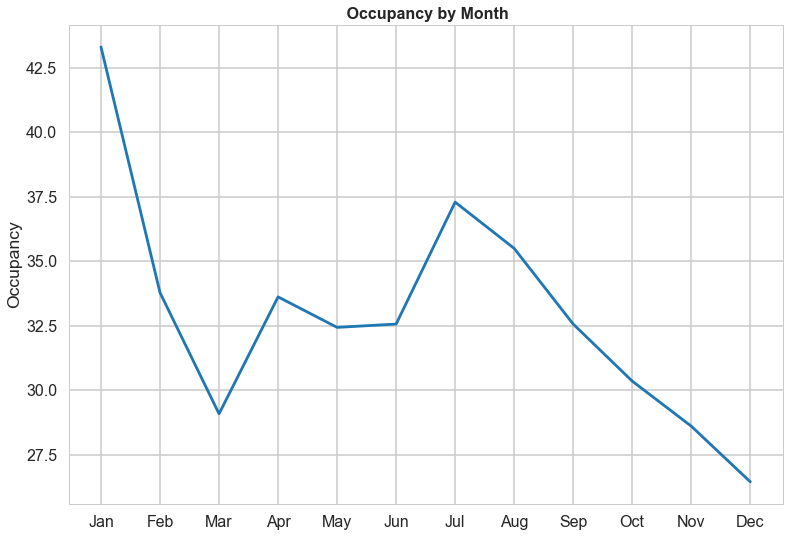

In [29]:

plot_answers('month', 'occupancy')

### 
From the analysis of our data, the Busiest time for Airbnb listings 
in Seattle is around January. Then we see a decline in occupancy 
from the peak period till March and then the occupancy rate begins 
to rise again. 




### What are the average prices at the busiest time ? 

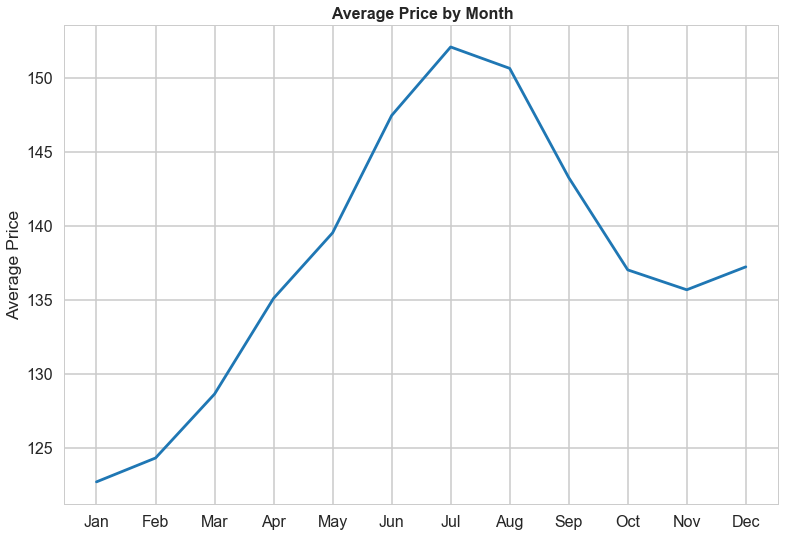

In [30]:

plot_answers('month', 'average_price')

#### 

The average price at the buiest time of airbnb listing in Seattle is around $122. As the month goes by, the average prices experience a rise. However, from July, when the prices are at the peak and when occupancy begins to decline, we also see a steady decrease in prices.

This begs the question, Is there a correlation between prices and  
occpancy. We can quickly use a scatterplot to visualize this. 

However, as the data is too large we will use a small sample size




In [31]:
sample_new_calendar = new_calendar.sample(150)

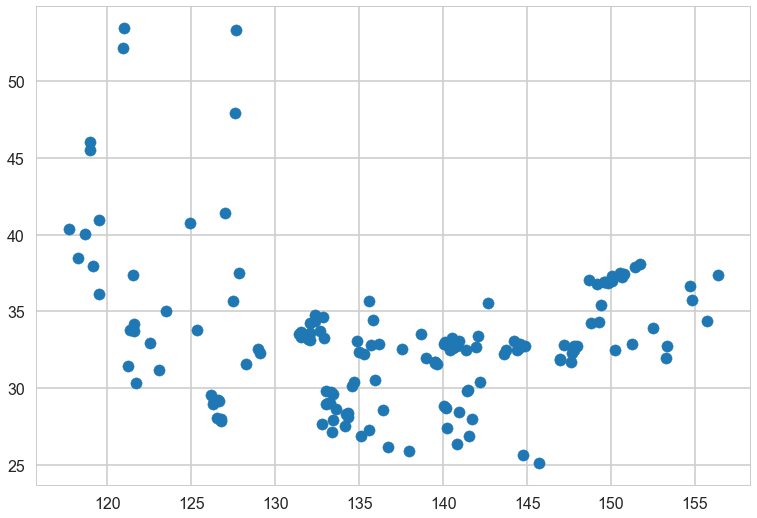

In [32]:
plt.scatter(sample_new_calendar['average_price'], sample_new_calendar['occupancy'])

#### 
Is there some sort of curvlinear relationship between these two 
variables? Further statistical analysis will shed more light on our question.
For now, let's take it up a notch to see the busiest time of the week 
and how prices flunctuate during the week

#### When is the busiest time of the week ?

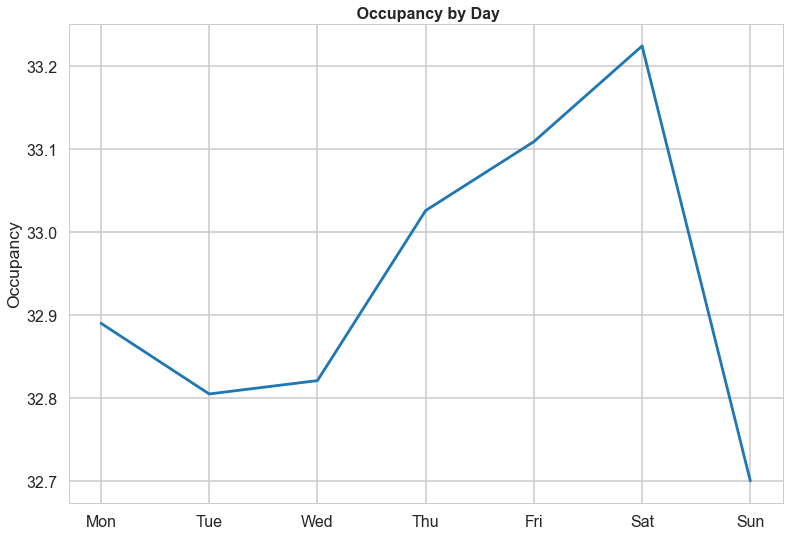

In [33]:
plot_answers('day', 'occupancy') 

#### 
The busiest time of the week is between Wednesday and Saturday, with the peak being saturday 

#### How are prices during the week ?

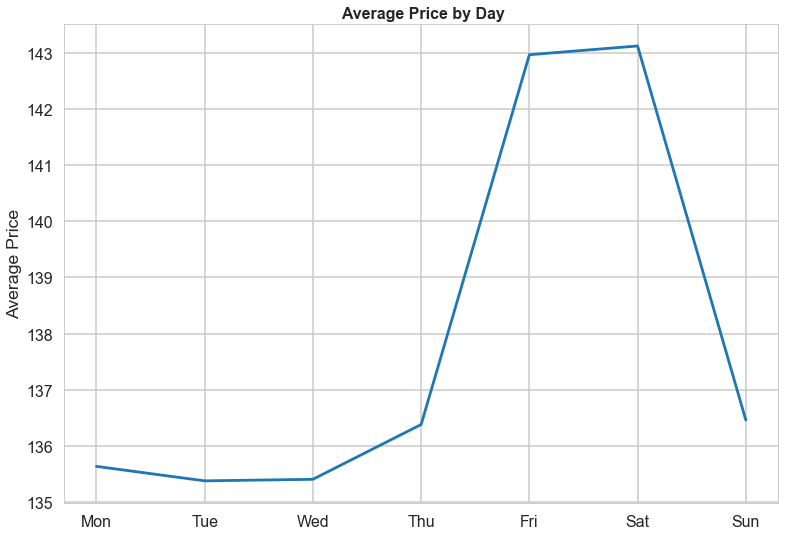

In [34]:
plot_answers('day', 'average_price') 

#### 
The prices follow a similar trend to that of occupancy, with prices rising from thursday and peaking on saturday, 
followed by a price drop on sunday 

#### 
Going back to determine the correlation between prices and occupancy for Airbnb in Seattle 



In [35]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [36]:
#Pearson's correlation coefficient

corr = pearsonr(sample_new_calendar['average_price'], sample_new_calendar['occupancy'])
print(corr)

(-0.1678208160519471, 0.04009539515240912)


#### 
This shows a very weak negative linear relationship.
However, the sample size might not be a good representation of the 
entire population. 

Using a correlation Matrix to check the correlation,

<AxesSubplot:>

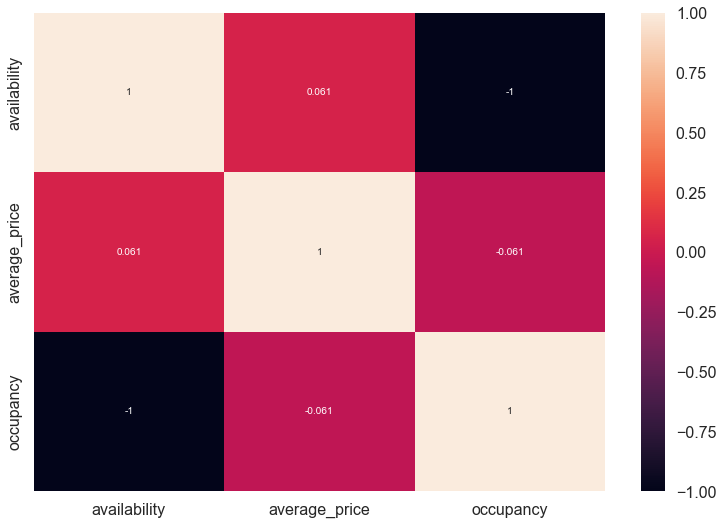

In [37]:
corrMatrix = new_calendar.corr()
sns.heatmap(corrMatrix, annot=True)

From the correlation Matrix, we can see that there is almost no linear correlation between average prices and occupancy.

### 2. Which neighborhoods have the most expensive listings?

To determine this, we will use the Listings data set. 

In [61]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [65]:
new_listings = listings[['id', 'neighbourhood_cleansed', 'zipcode', 'price']]
new_listings.sample(20)

,id,neighbourhood_cleansed,zipcode,price
1106,7075357,Eastlake,98102,129.0
2512,3404700,Riverview,98106,65.0
1594,9979329,First Hill,98104,185.0
519,9922335,Green Lake,98103,160.0
2513,533443,Riverview,98106,55.0
3079,5991139,Whittier Heights,98117,80.0
1579,7391003,First Hill,98101,75.0
2969,6445741,Broadway,98122,189.0
765,6575407,University District,98105,120.0
3281,7066118,Bitter Lake,98133,60.0


let's take a look at the price distribution

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of listings Prices')

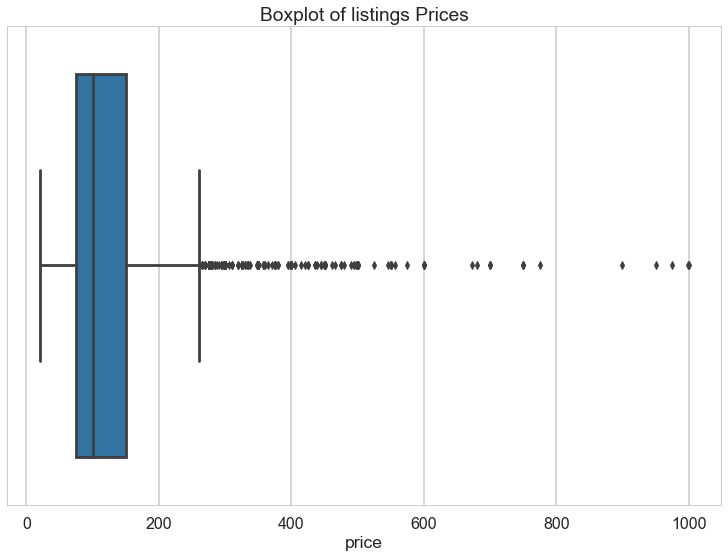

In [73]:
sns.boxplot(new_listings.price).set_title(
    'Boxplot of listings Prices')

In [74]:
new_listings['price'].describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

## LISTINGS

### Does Cancelatation policies have an effect on booking ?

<AxesSubplot:>

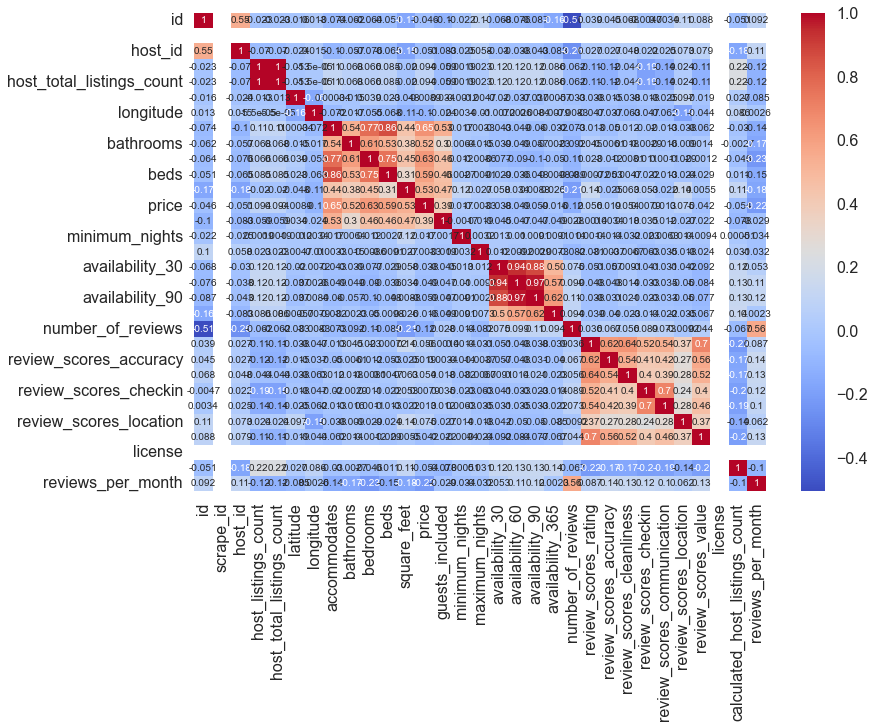

In [38]:
corrMatrix = listings.corr()
sns.heatmap(corrMatrix, annot=True, fmt= '.2g',cmap= 'coolwarm' )



This is enormous, we are going to subset the columns that we need

In [39]:
#selecting columns we need

cancel_price = listings[['id', 'cancellation_policy', 'price']]
cancel_price.rename(columns = {'id':'listing_id'},inplace = True)
cancel_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listing_id           3818 non-null   int64  
 1   cancellation_policy  3818 non-null   object 
 2   price                3818 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 89.6+ KB


/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [40]:
cancel_price.head()

,listing_id,cancellation_policy,price
0,241032,moderate,85.0
1,953595,strict,150.0
2,3308979,strict,975.0
3,7421966,flexible,100.0
4,278830,strict,450.0


In [41]:
calendar_listings = calendar.groupby('listing_id')['available'].mean().reset_index()

In [42]:
calendar_listings['occupancy'] = (1- calendar_listings['available'])* 100

calendar_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   listing_id  3818 non-null   int64  
 1   available   3818 non-null   float64
 2   occupancy   3818 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 89.6 KB


In [43]:
calendar_listings.head()

,listing_id,available,occupancy
0,3335,0.846575,15.342466
1,4291,1.000000,0.000000
2,5682,0.846575,15.342466
3,6606,1.000000,0.000000
4,7369,0.145205,85.479452


In [44]:
merging_df = pd.merge(cancel_price,calendar_listings, how ='left', on = 'listing_id')

In [45]:
merging_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 0 to 3817
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listing_id           3818 non-null   int64  
 1   cancellation_policy  3818 non-null   object 
 2   price                3818 non-null   float64
 3   available            3818 non-null   float64
 4   occupancy            3818 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 179.0+ KB


In [46]:
merging_df.head()

,listing_id,cancellation_policy,price,available,occupancy
0,241032,moderate,85.0,0.947945,5.205479
1,953595,strict,150.0,0.797260,20.273973
2,3308979,strict,975.0,0.602740,39.726027
3,7421966,flexible,100.0,0.391781,60.821918
4,278830,strict,450.0,1.000000,0.000000


In [47]:
merging_df.cancellation_policy.unique()

array(['moderate', 'strict', 'flexible'], dtype=object)

In [48]:
#converting canelation policy to dummy variables


merging_df['dummy_cancel_policy']= merging_df['cancellation_policy'].map(dict(strict=0, flexible=1,moderate=2))

In [49]:
merging_df.head()

,listing_id,cancellation_policy,price,available,occupancy,dummy_cancel_policy
0,241032,moderate,85.0,0.947945,5.205479,2
1,953595,strict,150.0,0.797260,20.273973,0
2,3308979,strict,975.0,0.602740,39.726027,0
3,7421966,flexible,100.0,0.391781,60.821918,1
4,278830,strict,450.0,1.000000,0.000000,0


<AxesSubplot:>

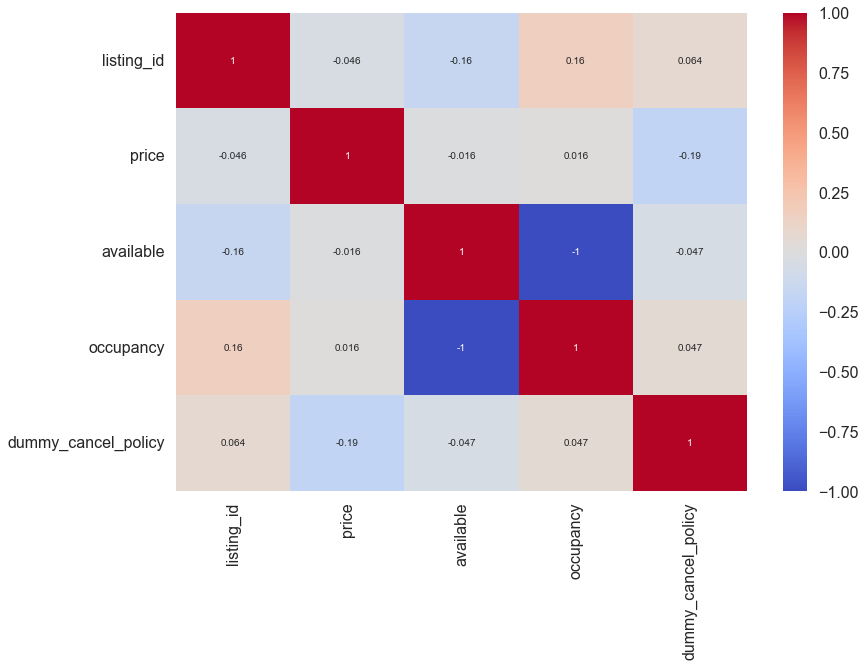

In [50]:
correlatonMatrix = merging_df.corr()
sns.heatmap(correlatonMatrix, annot=True, fmt= '.2g',cmap= 'coolwarm' )


#### According to the correlation matrix, there is no real linear correlation between occupancy and what the cancelation policy is. 

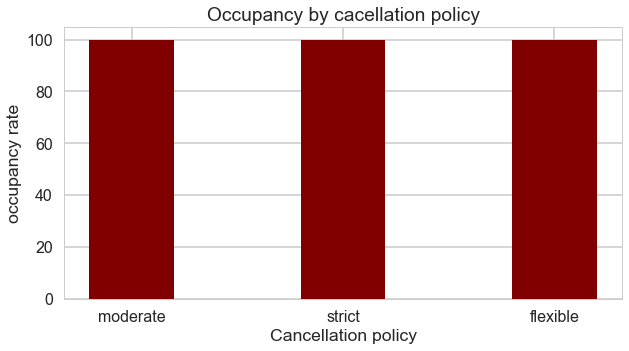

In [54]:
 

fig = plt.figure(figsize = (10, 5))

for i in merging_df.listing_id:
    if i == 278830:
        plt.bar(merging_df.cancellation_policy, merging_df.occupancy, color ='maroon',width = 0.4)
    
        plt.xlabel("Cancellation policy")
        plt.ylabel("occupancy rate")
        plt.title("Occupancy by cacellation policy")
        plt.show()


## 